In [76]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>Module 2-2: Graph Representation of Timeseries Signals</i></h1>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Max Chumley
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

# Overview

</br></br></br>

![](figures/2-2_overview.png)

## Goals of this module

- Apply the ordinal partition network to a timeseries to obtain its network representation.
- Apply the coarse-grained state space network to a timeseries to obtain its network representation.


# Network Representation

- Why represent as a network?

![](figures/NetworkPipeline_pers.png)

- Computationally expensive
- May not capture attractor structure

# Ordinal Partitions$^1$

![](figures/permutation_sequence_animation.gif)

# Ordinal Partition Network (OPN)$^1$

![](figures/ordinal_partition_network_video_basic.gif)

<font color=red>Requires embedding parameters $\tau$ and $n$</font>

# Higher Dimensional OPN ($n=7$)

![](figures/ordinal_partition_network_video_complex.gif)

# OPN Example

### Teaspoon Function: 

```python
teaspoon.SP.network.ordinal_partition_graph(ts, n=None, tau=None)
```
Returns the adjacency matrix of the network.

- Uses ```Multiscale Permutation Entropy``` for parameters by default.

See:
[teaspoon.SP.network_tools](https://teaspoontda.github.io/teaspoon/network.html#module-teaspoon.SP.network_tools) for miscellaneous network analysis tools built in to teaspoon.




# OPN Example

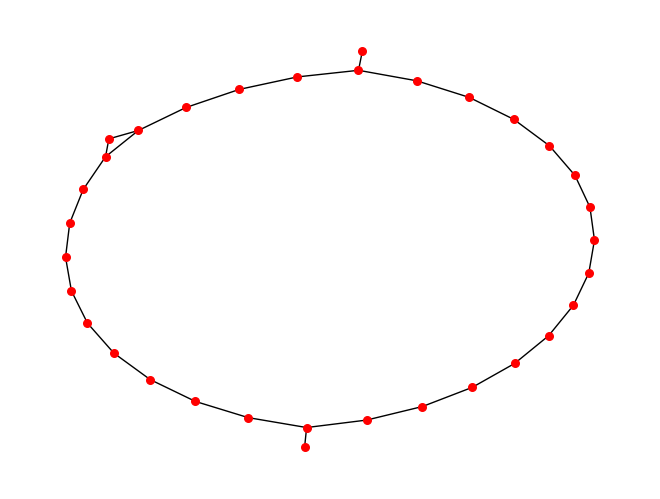

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
#teaspoon functions
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
A = ordinal_partition_graph(ts[0], n=5) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G, pos = make_network(A) #get networkx representation
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='red', node_size = 30)

# Coarse-Grained State Space Network (CGSSN)$^2$

![](figures/state_assignment_OPN_and_CGSSN.png)

$s_i=3(80) + 5(81) + 2(82) + 1 = 172$

# CGSSN Creation

</br></br></br>

![](figures/CGSSN_2d_example_cycle.gif)


# CGSSN Example

### Teaspoon Function:

```python
teaspoon.SP.network.cgss_graph(ts, B_array, n=None, tau=None)
```
- Generate CGSSN adjacency matrix 

```python
teaspoon.SP.tsa_tools.cgss_binning(ts, n=None, tau=None, b=12, binning_method='equal_size', plot_binning=False)
```
- Generate bin edges for cgssn



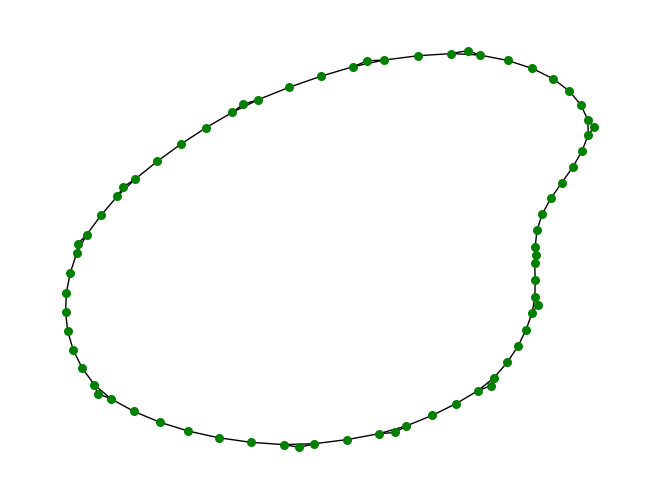

In [64]:
#import needed packages
import matplotlib.pyplot as plt
import networkx as nx
from teaspoon.SP.network import cgss_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
import teaspoon.SP.tsa_tools as tsa_tools
from teaspoon.SP.tsa_tools import takens
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.MsPE import MsPE_tau, MsPE_n
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
tau = MsPE_tau(ts[0]) # Esimtate tau and n using MSPE
n = MsPE_n(ts[0], tau)
B_array = tsa_tools.cgss_binning(ts[0], n, tau, b=8) #binning array
SSR = takens(ts[0], n, tau)  #state space reconstruction
A = cgss_graph(ts[0], B_array, n, tau) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G, pos = make_network(A) #get networkx representation
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='green', node_size = 30)

# Persistent Homology of Networks

</br></br></br></br>

![](figures/2-2_overview_dm_pd.png)

# Distances on Graphs$^2$

### Shortest Path:

$$C(P) = \sum_{e\in P}w(e)$$

$$D(a,b) = \min_{P}C(P)$$

- Unweighted set $w(e)=1$

### Weighted Shortest Path

$$C'(P)=\sum_{e\in P}\frac{1}{w(e)}$$

$$D(a,b) = \sum_{e\in P}w(e)$$ 

- Encodes information about frequency of traversal $^2$

# Distances on Graphs

### Shortest Weighted Path

$$C'(P)=\sum_{e\in P}\frac{1}{w(e)}$$

$$D(a,b) = |\min_{P}C'(P)|~~~~~\text{(Number of edges in $P$)}$$ 

- Gives higher priority to well traveled paths $^2$

# Distances on Graphs

### Diffusion Distance

$$P(i,j)=\frac{A(i,j)}{\sum_{k=1}^{|V|}A(i,k)}$$

- $A$ is adjacency matrix with no self loops
- $P$ is probability of transitioning from $i$ to $j$

#### t-random walk: $P^t(a,b)$

#### Lazy Transition Probability: $\tilde{P} = \frac{1}{2}[P(a,b)+I]~~~~$ (Allows for random walk to remain at current vertex)

$$d_t(a,b)=\sqrt{\sum_{c\in V}\frac{1}{\textbf{d}(c)}[\tilde{P}^t(a,c)-\tilde{P}^t(b,c)]^2}$$

- $\textbf{d}$ is the degree vector

# Distance Matrix and Persistence

![](figures/example_periodic_2D_CGSSN_D_PH.png)

# Network Persistence Example

### Teaspoon Functions

```python
teaspoon.TDA.PHN.DistanceMatrix(A, method='shortest_unweighted_path')
```
- Supports all distances discussed previously
- Returns distance matrix

```python
teaspoon.TDA.PHN.PH_network(D, max_homology_dimension=1)
```
- Returns persistence diagram


In [74]:
#teaspoon functions
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
from teaspoon.TDA.PHN import DistanceMatrix, point_summaries, PH_network
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
A = ordinal_partition_graph(ts[0], n = 6) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G = nx.from_numpy_matrix(A)
G.remove_edges_from(nx.selfloop_edges(G))
#create distance matrix and calculate persistence diagram
D = DistanceMatrix(A, method = 'diffusion_distance')
diagram = PH_network(D)
print('1-D Persistent Homology (loops): ', diagram[1])

1-D Persistent Homology (loops):  [[0.02592446 0.22763994]]


# You try it 

<div class = 'row'>
<div class = 'column'>
    
- Open the [1-1-Wkst-SimplicialCpx_Homology.ipynb](1-1-Wkst-SimplicialCpx_Homology) notebook and get started! 
- The notebook has both a basic example, and a challenge version.
- Answers are included but hidden.
- We will come back together in 10-15 minutes to start on the next module.
    
</div>
<div class = 'column'>

![](figures/Screenshot-1-1-Wkst.png)
        
</div>
</div>

# References

1. Myers, Audun, Elizabeth Munch, and Firas A. Khasawneh. "Persistent homology of complex networks for dynamic state detection." Physical Review E 100.2 (2019): 022314. 

2. Myers, Audun D., et al. "Persistent homology of coarse-grained state-space networks." Physical Review E 107.3 (2023): 034303.